# Student Achievement Analysis throgh Kaggle Dataset: Students' Achievements in Exams

## Introduction
This project explores the Kaggle dataset *Students' Achievements in Exams*, which contains detailed information about students’ performance in Math, Reading, and Writing, along with demographic and socioeconomic variables such as gender, parental education, lunch type, and test preparation.

The purpose of this analysis is to identify which factors most strongly influence academic performance and to visualize trends in student outcomes.

## Our Research Questions
1. Does completing the test preparation course improve exam scores?**  
2. Do male and female students perform differently across subjects?**  
3. How does parental education level influence student performance?**  
4. Does lunch type (standard vs free/reduced) affect exam results?**  
5. Which subjects are most strongly correlated with each other?**

Understanding these patterns can help educators design better support systems and we chose this because we felt that we could make an impact

Import Libraries

In [7]:
import pandas as pd                     #Imports pandas for loading the data and data manipulation
import numpy as np                      #Imports numpy for numerical operations
import seaborn as sns                   #Imports seaborn for data visualization
import matplotlib.pyplot as plt         #Imports matplotlib for plotting graphs and visualizations

plt.style.use('default')               #Uses the default style for matplotlib plots


Load Dataset

In [8]:
df = pd.read_csv("data/StudentsPerformance.csv") #Loads the dataset from the data folder
df.head()                                        #Displays the first 5 rows of the dataset 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset Exploration

In [9]:
print ("Dataset Shape:", df.shape)  #Show number of rows and columns

#Show data types and memory usage
print ("\nDataset Info:")           
print (df.info()) 

#Check for missing values in the dataset
print ("\n Missing Values:")
print (df.isnull().sum())

# Summary statistics of numerical columns
df.describe()

Dataset Shape: (1000, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

 Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Columns 

In [10]:
# Rename long columns to shorter names for easier use
df = df.rename(columns={
    "race/ethnicity": "race_ethnicity", 
    "parental level of education": "parental_edu",
    "test preparation course": "test_prep",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
})

#Create an average score column
df["avg_score"] = df[["math_score", "reading_score", "writing_score"]].mean(axis=1)

#Display dataset after changes
df.head()

,gender,race_ethnicity,parental_edu,lunch,test_prep,math_score,reading_score,writing_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


## Question 1: Does completing the test preparation course improve exam scores?
We compare the average scores of students who completed the test preparation course with those who did not.

Question 1 Analysis 

In [11]:
# Group by test prep status and calculate mean scores
prep_mean = df.groupby("test_prep")[["math_score", "reading_score", "writing_score", "avg_score"]].mean()

# Show results
prep_mean 

,math_score,reading_score,writing_score,avg_score
test_prep,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


Question 1 Visualization

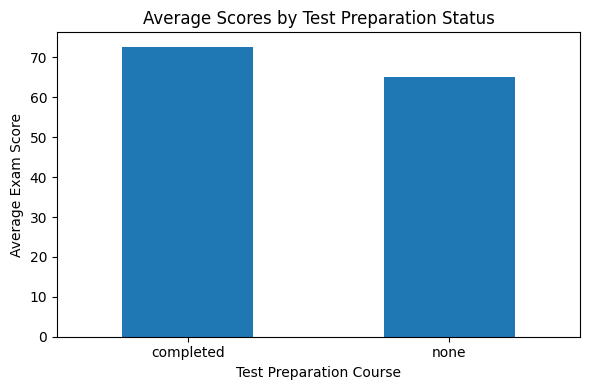

In [12]:
prep_mean["avg_score"].plot(kind = "bar", figsize = (6,4))

plt.title("Average Scores by Test Preparation Status")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Exam Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

QUESTION 2 - Gender Differences

## Question 2: Do male and female students perform differently across subjects?
We examine whether there are performance differences across math, reading, and writing based on gender.

Q2 Analysis (Code)

In [13]:
gender_mean = df.groupby("gender")[["math_score","reading_score","writing_score","avg_score"]].mean()
gender_mean 

,math_score,reading_score,writing_score,avg_score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


## Question 3 - Parental Education Influence

**Question 3: How does parental education level influence student performance?**
This analysis explores whether higher parental education corresponds to higher student achievement.

Q3 Analysis (Code)

In [19]:
# 1. Show current columns so we can see what they look like
print("Current columns:\n", list(df.columns), "\n")

# 2. Automatically find the parental-education column by looking for "parent" in the name
parent_candidates = [c for c in df.columns if "parent" in c.lower()]
if not parent_candidates:
    raise KeyError("Could not find a column related to parent education in df.columns")
parent_col = parent_candidates[0]
print("Using parent column:", parent_col)

# 3. Automatically find the math/reading/writing score columns
math_col    = [c for c in df.columns if "math"    in c.lower()][0]
reading_col = [c for c in df.columns if "reading" in c.lower()][0]
writing_col = [c for c in df.columns if "writing" in c.lower()][0]
print("Score columns:", math_col, reading_col, writing_col)

# 4. Make sure avg_score exists (create if missing)
if "avg_score" not in df.columns:
    df["avg_score"] = df[[math_col, reading_col, writing_col]].mean(axis=1)

# 5. Now do the groupby using the detected column names
parent_mean = df.groupby(parent_col)[[math_col, reading_col, writing_col, "avg_score"]].mean()

# 6. Sort so the highest avg_score appears at the top
parent_mean = parent_mean.sort_values("avg_score", ascending=False)

parent_mean


Current columns:
 ['gender', 'race_ethnicity', 'parental_edu', 'lunch', 'test_prep', 'math_score', 'reading_score', 'writing_score', 'avg_score'] 

Using parent column: parental_edu
Score columns: math_score reading_score writing_score


,math_score,reading_score,writing_score,avg_score
parental_edu,,,,
master's degree,69.745763,75.372881,75.677966,73.598870
bachelor's degree,69.389831,73.000000,73.381356,71.923729
associate's degree,67.882883,70.927928,69.896396,69.569069
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007
high school,62.137755,64.704082,62.448980,63.096939


## Q3 Visualization (Code) 

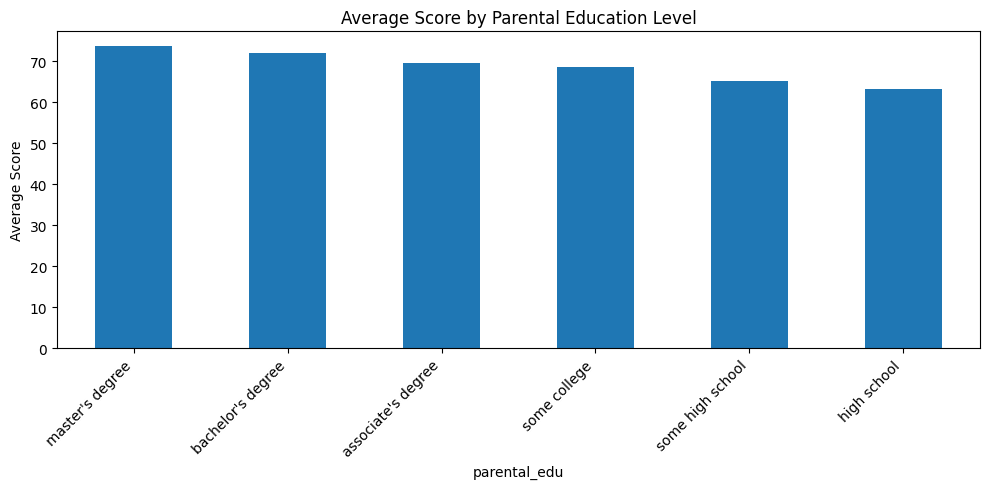

In [20]:
parent_mean["avg_score"].sort_values(ascending=False).plot(kind="bar", figsize=(10,5))

plt.title("Average Score by Parental Education Level")
plt.ylabel("Average Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Question 4 - Lunch Type (Socioeconimic Indicator)

In [21]:
lunch_mean = df.groupby("lunch")[["math_score","reading_score","writing_score","avg_score"]].mean()
lunch_mean

,math_score,reading_score,writing_score,avg_score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


## Q4 Visualization (Code) 

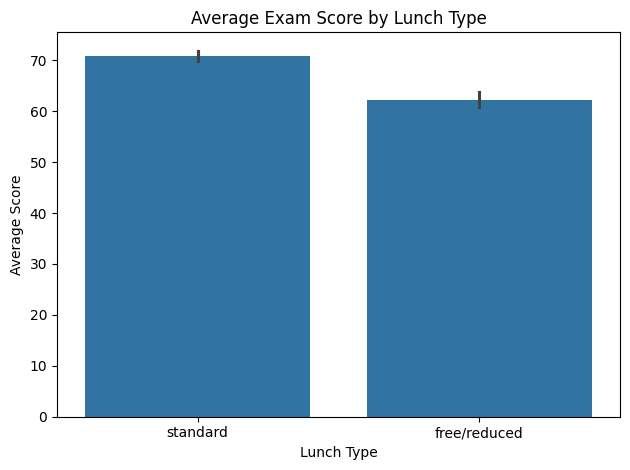

In [22]:
sns.barplot(data=df, x="lunch", y="avg_score")

plt.title("Average Exam Score by Lunch Type")
plt.ylabel("Average Score")
plt.xlabel("Lunch Type")
plt.tight_layout()
plt.show() 

QUESTION 5 — Subject Correlation 

## Question 5: Which subjects are most strongly correlated with each other?
We examine the relationships between math, reading, and writing scores.


In [23]:
corr = df[["math_score","reading_score","writing_score"]].corr()
corr

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


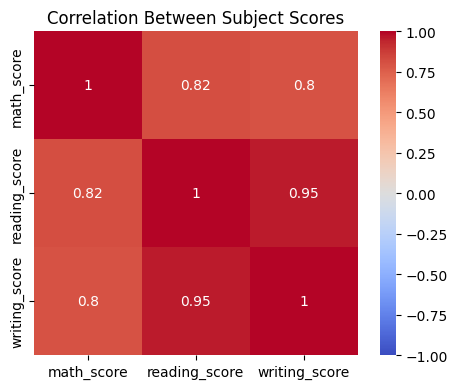

In [24]:
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, vmin=-1, vmax=1)
plt.title("Correlation Between Subject Scores")
plt.tight_layout()
plt.show() 

# **Conclusion**

### **Key Takeaways**
- Students who completed the test preparation course scored higher overall.
- There are measurable performance differences between male and female students.
- Higher parental education levels strongly correlate with higher scores.
- Lunch type (standard vs free/reduced) show clear performance gaps based on socioeconic status 
- Reading and Writing scores have the strongest correlation.

### **Summary** 
Students perfomance is influnced by a combination of socioeconomic and academic support factors.